In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from bce import *
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA

In [2]:
data_dict = data_clean('./bihar_features_gee.csv')

Begin data cleaning.
Read in data from ./bihar_features_gee.csv sucessfully.
All dataframes and labels generated.
Column Percentage Electrified does not exist
Column Number of Electrified Households does not exist
Column Unnamed: 0 does not exist
Column Census 2011 ID does not exist
Column Number_of_Households does not exist
Column Percentage Electrified does not exist
Column Number of Electrified Households does not exist
Column Unnamed: 0 does not exist
Column Census 2011 ID does not exist
Column Number_of_Households does not exist
Column Percentage Electrified does not exist
Column Number of Electrified Households does not exist
Column Unnamed: 0 does not exist
Column Census 2011 ID does not exist
Column Number_of_Households does not exist
Deleting useless and predictive informative columns
Data cleaning successful.
NaN left: []
NaN left: []
NaN left: []


In [3]:
df, label = data_dict['df'][0], np.array(data_dict['label'][0])
del data_dict

In [4]:
gdb = GradientBoostingClassifier(n_estimators=7, 
                                         max_depth=6,
                                         min_samples_split=1780, 
                                         min_samples_leaf=1,
                                         random_state=20180320,
                                         subsample=0.8, 
                                         learning_rate=0.11)
gdb.fit(df, label)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.11, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=1780,
              min_weight_fraction_leaf=0.0, n_estimators=7, presort='auto',
              random_state=20180320, subsample=0.8, verbose=0,
              warm_start=False)

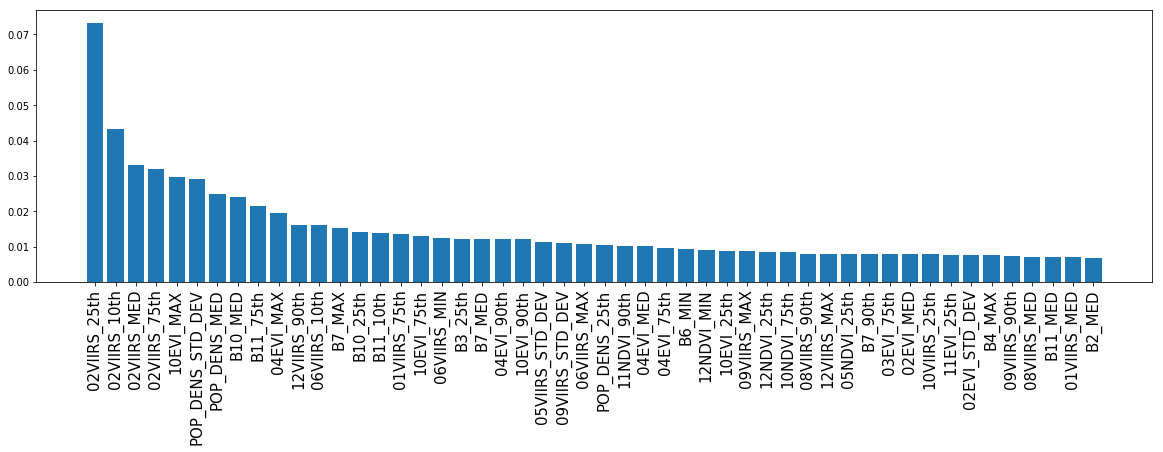

In [5]:
def feature_importance(df, classifier):
    dic = {'names':df.columns.tolist(), 'importance':classifier.feature_importances_.tolist()}
    feature_importance = pd.DataFrame(dic).query('importance > 0').sort_values('importance', ascending=False)
    plt.figure(figsize=(20,5))
    plt.bar(x=feature_importance.names[:50], height=feature_importance.importance[:50])
    plt.xticks(feature_importance.names[:50], feature_importance.names[:50], rotation='vertical', fontsize=15)
    plt.show()
    return feature_importance
gdb_importances = feature_importance(df, gdb)

In [22]:
gdb_importances.to_csv('./gdb_feature_impor.csv')

In [18]:
gdb.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [7]:
gdb_params = {
    'learning_rate':np.arange(0.01, 0.2, 0.01),
    'n_estimators':range(1, 10),
    'max_features':range(50,369,20),
    'max_depth':range(3,7),
    'min_samples_split':range(1,2001,100),
    'min_samples_leaf':range(1,71,10)
}

gdb = GradientBoostingClassifier(n_estimators=7, 
                                   random_state=20180320)

grid_search = GridSearchCV(estimator = gdb, 
                        param_grid = gdb_params, 
                        scoring='roc_auc', 
                        n_jobs=20, 
                        iid=False, 
                        cv=5)

In [11]:
# grid_search.fit(df, label)
# grid_search.best_params_, grid_search.best_score_

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log = LogisticRegression()

In [12]:
log.fit(df, label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
import re

In [20]:
gdb_importances = gdb_importances.assign(cate = gdb_importances.names.apply(lambda x: re.findall(r'VIIRS|EVI|POP_DENS|B|NDVI', x)[0]))

In [28]:
cate_dict = {}
for c in gdb_importances.cate.unique():
    cate_dict[c] = sum(gdb_importances[gdb_importances.cate == c].importance)

In [29]:
cate_dict

{'B': 0.20904451733989438,
 'EVI': 0.19059406270044146,
 'NDVI': 0.11995896040877353,
 'POP_DENS': 0.07127405708802213,
 'VIIRS': 0.4091284024628686}

In [30]:
import matplotlib.pyplot as plt

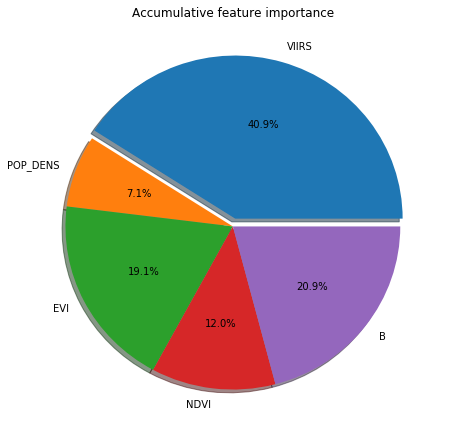

In [44]:
plt.figure(figsize=[7.5, 7.5])
plt.pie([float(v) for v in cate_dict.values()], explode=[.05, 0,0,0,0],
        labels=[k for k in cate_dict], 
        autopct='%1.1f%%', shadow=True)
plt.title('Accumulative feature importance')
plt.savefig('./feature importance accum')

In [39]:
[float(v) for v in cate_dict.values()]

[0.4091284024628686,
 0.07127405708802213,
 0.19059406270044146,
 0.11995896040877353,
 0.20904451733989438]

In [49]:
df_all = df.assign(outcome = label)

In [51]:
corr_matrix = df_all.corr()['outcome']

In [63]:
df_corr = pd.DataFrame({'name': corr_matrix.index, 'value': corr_matrix.values}).drop(368)

In [66]:
df_corr = df_corr.assign(cate = df_corr.name.apply(lambda x: re.findall(r'VIIRS|EVI|POP_DENS|B|NDVI', x)[0]))

In [73]:
corr_dict = {}
for c in df_corr.cate.unique():
    corr_dict[c] = sum(abs(df_corr[df_corr.cate == c].value))

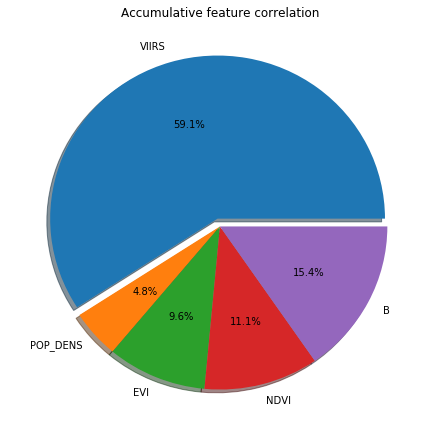

In [77]:
plt.figure(figsize=[7.5, 7.5])
plt.pie([float(v) for v in corr_dict.values()], explode=[.05, 0,0,0,0],
        labels=[k for k in corr_dict], 
        autopct='%1.1f%%', shadow=True)
plt.title('Accumulative feature correlation')
plt.show()
# plt.savefig('./feature importance accum')

In [72]:
corr_dict

{'B': -0.5766392005890456,
 'EVI': -0.11664728618144513,
 'NDVI': -0.052589915969775664,
 'POP_DENS': 0.21487261436166896,
 'VIIRS': 2.639615269039879}

In [78]:
cate_dict

{'B': 0.20904451733989438,
 'EVI': 0.19059406270044146,
 'NDVI': 0.11995896040877353,
 'POP_DENS': 0.07127405708802213,
 'VIIRS': 0.4091284024628686}

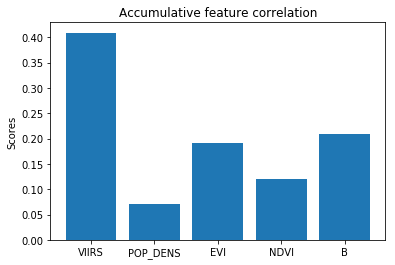

In [92]:
plt.bar(cate_dict.keys(), cate_dict.values())
plt.xticks()
plt.ylabel('Scores')
plt.title('Accumulative feature correlation')
plt.show()

In [93]:
import seaborn as sns

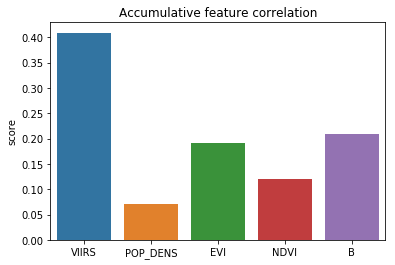

In [101]:
sns.barplot(x=[i for i in cate_dict.keys()], y=[i for i in cate_dict.values()])
plt.ylabel('score')
plt.title('Accumulative feature correlation')
plt.show()

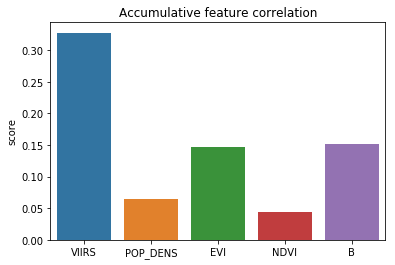

In [113]:
gdb_importances_50 = gdb_importances.loc[gdb_importances.importance[:50].index, ]
cate_dict_50 = {}
for c in gdb_importances_50.cate.unique():
    cate_dict_50[c] = sum(gdb_importances_50[gdb_importances_50.cate == c].importance)
sns.barplot(x=[i for i in cate_dict_50.keys()], y=[i for i in cate_dict_50.values()])
plt.ylabel('score')
plt.title('Accumulative feature correlation')
plt.show()

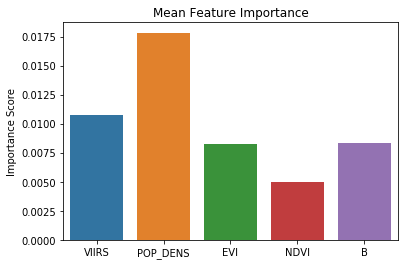

In [123]:
cate_dict_MAX = {}
for c in gdb_importances.cate.unique():
    cate_dict_MAX[c] = np.mean(sorted(gdb_importances[gdb_importances.cate == c].importance))
sns.barplot(x=[i for i in cate_dict_MAX.keys()], y=[i for i in cate_dict_MAX.values()])
plt.ylabel('Importance Score')
plt.title('Mean Feature Importance')
plt.show()

In [124]:
import plotly

ImportError: No module named 'plotly'